<a href="https://colab.research.google.com/github/COFAlumni-USB/Physics-REBoot-Applied-Science-Bootcamp/blob/main/Resultados_Hands-On_Estudiantes/Dia%201/Jes%C3%BAs_Santos_Modelo_SEIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

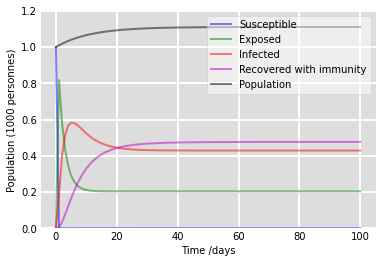

['builtins',
 'builtins',
 'IPython.core.shadowns',
 'numpy',
 'scipy.integrate',
 'matplotlib',
 'matplotlib.pyplot',
 'types']

In [ ]:
import numpy as np
import scipy.integrate as si
from scipy.integrate import odeint
import matplotlib as ml
from matplotlib import pyplot as plt

N=1000        #Población total  
E0=0          #Número inicial de personas expuestas
I0=1          #Número inicial de personas infectadas
R0=0          #Número de personas recuperadas
S0=N-E0-I0-R0    #Número inicial de personas susceptibles

gamma=0.1  #Tasa de recuperación
beta=0.2      #Tasa de contacto
alpha=0.4       #Tasa de incubación
mu=0.09        #Tasa de mortalidad
nu=0.1       #Tasa de natalidad

Total_dias = 100  #Tiempo final
T_0= 0            #Tiempo inicial
num=100          #Número de puntos en el array 1D

#Se introduce la variable de tiempo 

t = np.linspace(T_0, Total_dias, num)


#Se introduce una funcion "f" que depende del tiempo "t" y un vector "$\vec{y}$"

def f(y, t, N, beta, gamma, alpha, mu, nu):
    S, E, I, R = y
    dSdt = -beta * S * I + nu*N - mu*S
    dEdt = beta * S * I - alpha * E - mu * E
    dIdt = alpha * E - gamma * I - mu * I
    dRdt = gamma * I - mu * R
    return dSdt, dEdt, dIdt, dRdt

#Condiciones iniciales
y_0=S0, E0, I0, R0

#Integrando las ecuaciones de SEIR a lo largo del tiempo t.
ret = odeint(f, y_0, t, args=(N, beta, gamma, alpha, mu, nu))
S, E, I, R = ret.T



#Se realiza el gráfico

fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, S/1000, 'b', alpha=0.5, lw=2, label='Susceptible')
ax.plot(t, E/1000, 'g', alpha=0.5, lw=2, label='Exposed')
ax.plot(t, I/1000, 'r', alpha=0.5, lw=2, label='Infected')
ax.plot(t, R/1000, 'm', alpha=0.5, lw=2, label='Recovered with immunity')
ax.plot(t, (S+E+I+R)/1000, 'k', alpha=0.5, lw=2, label='Population')

ax.set_xlabel('Time /days')
ax.set_ylabel('Population (1000 personnes)')
ax.set_ylim(0,1.2)

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')

legend = ax.legend()
legend.get_frame().set_alpha(0.5)

for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
    
plt.show()


#libs summary
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())